# Practical design of a learning algorithm
Using the Linear & Logistic Regression implement a routine that uses kfold cross validation for model selection on digits dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Task 1
- Load Optical Recognition of Handwritten Digits Data Set

In [2]:
# Load the digits data set
digits = datasets.load_digits()
X_data = digits.data
Y_data = digits.target

# Shuffle the data
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X_data))
X_data, Y_data = X_data[permutation], Y_data[permutation]

# Split the data to train and test
X_data_train, X_data_test, Y_data_train, Y_data_test = X_data[:1200], X_data[1200:], Y_data[:1200], Y_data[1200:]

## Task 2
- Implement Linear and Logistic Regression

In [3]:
def lin_regression(X, Y):
        X_pseudo = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T)
        W_lin = np.dot(X_pseudo, Y)
        return W_lin
    
def log_regression(X, Y, T=2000, learning_rate=0.001):
    W = np.zeros((X.shape[1],)) 
    for i in range(T):
        n = np.random.randint(0,len(X))
        x_n = X[n]
        E_dev = (-Y[n] * x_n)/(1 + np.exp((Y[n] * np.dot(W, x_n))))
        W = W - learning_rate * E_dev
    return W

def generate_D_Y(Y, k):
    Y_copy = np.copy(Y)
    for i, y in enumerate(Y_copy):
        Y_copy[i] = 2 * (int(y) == k) - 1
    return Y_copy

def sigmoid(x):
    return 1/(1+np.exp(-x))

def calculate_prob(W, X):
    probs = []
    for i in range(10):
        probs.append(sigmoid(np.dot(X, W[i])))
    return probs

def predict(p):
    Y_pred = []
    for i in range(len(p[0])):
        Y_pred.append(np.argmax(p[:,i]))
    return Y_pred

def calculate_accuracy(Y_pred, Y):
    correct = 0
    for i in range(len(Y)):
        if Y_pred[i] == Y[i]:
            correct += 1
    return correct/len(Y)

### Linear Regression

In [4]:
class linear_regression:
    def fit(X, Y):
        W = []
        for i in range(10):
            W.append(lin_regression(X, generate_D_Y(Y, i)))
        return W

    def score(X, Y, W):
        probs = calculate_prob(W, X)
        Y_pred = predict(np.array(probs))
        return calculate_accuracy(Y_pred, Y)

### Logistic Regression

In [5]:
class logistic_regression:    
    def fit(X, Y):
        W = []
        for i in range(10):
            W.append(log_regression(X, generate_D_Y(Y, i)))
        return W

    def score(X, Y, W):
        probs = calculate_prob(W, X)
        Y_pred = predict(np.array(probs))
        return calculate_accuracy(Y_pred, Y)

## Task 3 
- Write a function that divides the on digits dataset (training) set (of size m) into n disjoint sets S1 , ..., Sn of equal size n/m. 
- For each Si: Train a classifier (e.g. Lin Reg. Log Reg) on S\Si, Test it on Si ← error(i)
- Output the average error

In [6]:
def crossval(X, Y, classifier, k):
    n_samples = len(X)
    fold_size = n_samples // k
    scores = []
    masks = []

    for fold in range(k):
        test_mask = np.zeros(n_samples, dtype=bool)
        test_mask[fold * fold_size : (fold + 1) * fold_size] = True
        masks.append(test_mask)

        X_test, Y_test = X[test_mask], Y[test_mask]
        X_train, Y_train = X[~test_mask], Y[~test_mask]

        W = classifier.fit(X_train, Y_train)

        scores.append(classifier.score(X_test, Y_test, W))
    return scores, W

## Task 4
- Report the comparative analysis of the performance of Linear and Logistic regression and when you change the number of folds in validation (5 fold vs. 10 fold vs. 20 fold vs. loocv).

### Logistic Regression

In [7]:
scores_log_reg_5fold, W_log_5fold = crossval(X_data_train, Y_data_train, logistic_regression, 5)
scores_log_reg_10fold, W_log_10fold = crossval(X_data_train, Y_data_train, logistic_regression, 10)
scores_log_reg_20fold, W_log_20fold = crossval(X_data_train, Y_data_train, logistic_regression, 20)
scores_log_reg_loocv, W_log_loocv = crossval(X_data_train, Y_data_train, logistic_regression, len(X_data_train)-1)

In [8]:
print('avg accuracy of logistic regression (5 folds) :', np.mean(scores_log_reg_5fold))
print('avg accuracy of logistic regression (10 folds):', np.mean(scores_log_reg_10fold))
print('avg accuracy of logistic regression (20 folds):', np.mean(scores_log_reg_20fold))
print('avg accuracy of logistic regression (loocv)   :', np.mean(scores_log_reg_loocv))

avg accuracy of logistic regression (5 folds) : 0.9258333333333333
avg accuracy of logistic regression (10 folds): 0.9241666666666669
avg accuracy of logistic regression (20 folds): 0.9341666666666667
avg accuracy of logistic regression (loocv)   : 0.9199332777314428


### Linear Regression

In [9]:
scores_lin_reg_5fold, W_lin_5fold = crossval(X_data_train, Y_data_train, linear_regression, 5)
scores_lin_reg_10fold, W_lin_10fold = crossval(X_data_train, Y_data_train, linear_regression, 10)
scores_lin_reg_20fold, W_lin_20fold = crossval(X_data_train, Y_data_train, linear_regression, 20)
scores_lin_reg_loocv, W_lin_loocv = crossval(X_data_train, Y_data_train, linear_regression, len(X_data_train)-1)

In [10]:
print('avg accuracy of linear regression (5 folds) :', np.mean(scores_lin_reg_5fold))
print('avg accuracy of linear regression (10 folds):', np.mean(scores_lin_reg_10fold))
print('avg accuracy of linear regression (20 folds):', np.mean(scores_lin_reg_20fold))
print('avg accuracy of linear regression (loocv)   :', np.mean(scores_lin_reg_loocv))

avg accuracy of linear regression (5 folds) : 0.9275
avg accuracy of linear regression (10 folds): 0.9308333333333334
avg accuracy of linear regression (20 folds): 0.9291666666666665
avg accuracy of linear regression (loocv)   : 0.9357798165137615


### Final Evaluation on Test Data

In [13]:
print('log reg (5folds) :', logistic_regression.score(X_data_test, Y_data_test, W_log_5fold))
print('log reg (10folds):', logistic_regression.score(X_data_test, Y_data_test, W_log_10fold))
print('log reg (20folds):', logistic_regression.score(X_data_test, Y_data_test, W_log_20fold))
print('log reg (loocv)  :', logistic_regression.score(X_data_test, Y_data_test, W_log_loocv))

log reg (5folds) : 0.9514237855946399
log reg (10folds): 0.9296482412060302
log reg (20folds): 0.9463986599664992
log reg (loocv)  : 0.9380234505862647


In [14]:
print('lin reg (5folds) :', linear_regression.score(X_data_test, Y_data_test, W_lin_5fold))
print('lin reg (10folds):', linear_regression.score(X_data_test, Y_data_test, W_lin_10fold))
print('lin reg (20folds):', linear_regression.score(X_data_test, Y_data_test, W_lin_20fold))
print('lin reg (loocv)  :', linear_regression.score(X_data_test, Y_data_test, W_lin_loocv))

lin reg (5folds) : 0.9346733668341709
lin reg (10folds): 0.9430485762144054
lin reg (20folds): 0.9430485762144054
lin reg (loocv)  : 0.9413735343383585


### Report 
The results show that the performance of Linear and Logistic Regression is similarly accurate, about 93%. Furthermore, the number of folds does not significantly affect the performance neither. Although the loocv is time consuming while training, it does not show outstanding performance. Therefore, I would not choose models with loocv. Also, the performance on final evaluation with a test data is approximately the same. That means there was no overfitting in any of the model. The logistic regression is time consuming while training, whereas linear regression is more efficient in this. Based on these finding I would choose the Linear Regression with 10 folds.

## Task 5
- Perform GridSearchCV based tenfold cross validation using the Scikit-learn module and compare the performance of Linear and Logistic regression on digits dataset. 
- For each model plot the validation curves using Scikit-Learn to justfy your selection of a final model. Explain shortly how you addressed bias-variance tradeoff, and that your model has not overfitted the digits dataset.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression

### GridSearchCV on Logistic Regression

In [16]:
grid = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), param_grid={'C': [0.001]}, cv=10)
grid.fit(X_data, Y_data)
print(grid.best_score_)

0.9510294936004452


### GridSearchCV on Linear Regression

In [17]:
grid = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': [True, False]}, cv=10)
grid.fit(X_data, Y_data)
print(grid.best_score_)

0.5648153656467219


### Report 
Based on the GridSearchCV the sklearn logistic regression performes significantly better than the sklearn linear regression.

### Validation Curve on Logistic Regression
30 corresponds to loocv, just for the sake of clarity of the graph

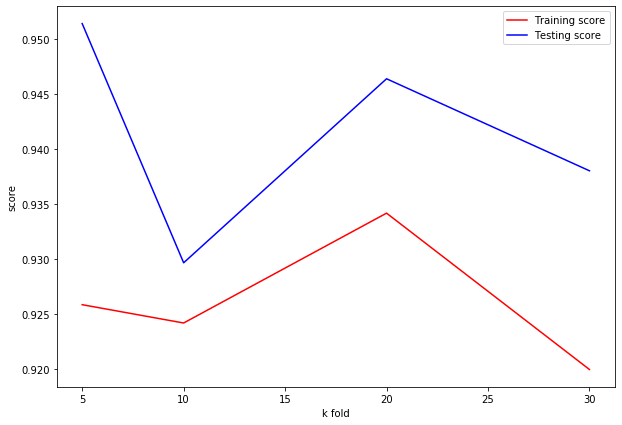

In [18]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot([5, 10, 20, 30], [np.mean(scores_log_reg_5fold), np.mean(scores_log_reg_10fold),
                                          np.mean(scores_log_reg_20fold), np.mean(scores_log_reg_loocv)], 
         'r', label="Training score")
plt.plot([5, 10, 20, 30], [logistic_regression.score(X_data_test, Y_data_test, W_log_5fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_log_10fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_log_20fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_log_loocv)],
         'b', label="Testing score")

plt.xlabel("k fold")
plt.ylabel("score")
plt.legend()
plt.show()

### Validation Curve on Linear Regression
30 corresponds to loocv, just for the sake of clarity of the graph

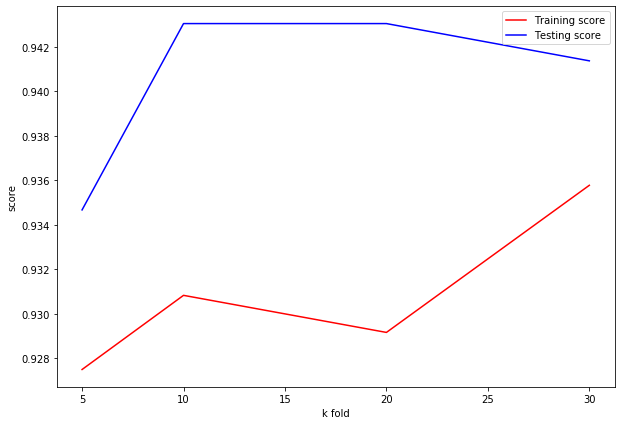

In [19]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot([5, 10, 20, 30], [np.mean(scores_lin_reg_5fold), np.mean(scores_lin_reg_10fold),
                                          np.mean(scores_lin_reg_20fold), np.mean(scores_lin_reg_loocv)], 
         'r', label="Training score")
plt.plot([5, 10, 20, 30], [logistic_regression.score(X_data_test, Y_data_test, W_lin_5fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_lin_10fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_lin_20fold),
                                          logistic_regression.score(X_data_test, Y_data_test, W_lin_loocv)],
         'b', label="Testing score")

plt.xlabel("k fold")
plt.ylabel("score")
plt.legend()
plt.show()

### Conclusion
It can be seen from the validation curves that the linear regression with 10 folds performes the best on the test data set. There is no overfitting in any of the models, because the accuracy on test is not less than on the training data set. 